**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Análisis Avanzado de Datos

**Departamento:** Ingeniería Aeroespacial

**Facultad de Ingeniería - Universidad de Antioquia**

# Agrupamiento Jerarquico

## Lectura de Datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import requests
import io
import requests
import time

In [ ]:
urls = ["https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/9.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/10.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/11.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/12.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/13.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/14.csv",
        "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/15.csv"]

In [ ]:
fuentes = [r'1.csv',
           r'2.csv',
           r'3.csv',
           r'4.csv',
           r'5.csv',
           r'6.csv',
           r'7.csv',
           r'8.csv',
           r'9.csv',
           r'10.csv',
           r'11.csv',
           r'12.csv',
           r'13.csv',
           r'14.csv',
           r'15.csv']

In [ ]:
Inception = zip(urls, fuentes)

In [ ]:
def download_url(args):
    t0 = time.time()
    url, fn = args[0], args[1]
    try:
        r = requests.get(url)
        with open(fn, 'wb') as f:
            f.write(r.content)
        return(url, time.time() - t0)
    except Exception as e:
        print('Exception in download_url():', e)

In [ ]:
t0 = time.time()
for i in Inception:
    result = download_url(i)
    print('url:', result[0], 'time:', result[1])
print('Total time:', time.time() - t0)

url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/1.csv time: 0.424041748046875
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/2.csv time: 0.18393659591674805
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/3.csv time: 0.2741396427154541
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/4.csv time: 0.3365311622619629
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/5.csv time: 0.17592740058898926
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/6.csv time: 0.3948848247528076
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/7.csv time: 0.190993070602417
url: https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/8.csv time: 0.26883697509765625
url: https://raw.githubusercontent.com/javierfernandobotia/Anal

In [ ]:
data = pd.concat(map(pd.read_csv, ['1.csv','2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv',
                                   '11.csv', '12.csv', '13.csv', '14.csv', '15.csv'], ','), ignore_index = True, sort = False, axis = 1)
display(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/concat.py:304: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  sort=sort,


,0,1,2,3
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [ ]:
data = pd.DataFrame(data.values, columns = ['Time(s)', 'x acceleration', 'y acceleration', 'z acceleration'])
display(data)

,Time(s),x acceleration,y acceleration,z acceleration
0,0.030639,0.14982,3.48680,9.2755
1,0.069763,-0.29965,1.94770,9.1120
2,0.099823,-1.68890,1.41650,10.1200
3,0.129820,-2.17930,0.95342,10.9240
4,0.159790,-2.30180,0.23155,10.6510
...,...,...,...,...
5063,154.070000,-0.69464,5.05310,8.0769
5064,154.100000,-0.14982,5.17570,9.0030
5065,154.140000,-0.53119,5.32560,8.1177
5066,154.170000,-0.80360,5.28470,7.8589


In [ ]:
TIME = data['Time(s)']
X = data[['x acceleration','y acceleration', 'z acceleration']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler(feature_range = (0,1))
X_norm = MM.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns = ['x acceleration','y acceleration', 'z acceleration'])

## Creando la Matriz de Conectividad con la Base de Datos

In [ ]:
from sklearn.neighbors import kneighbors_graph # Crea una matriz de los vecinos más cercanos para 
                                               # diferentes puntos de los datos. Esto es equivalente
                                               # a la matriz de conectividad.

In [ ]:
Numero_Vecinos = 5
Modo_Relacion_Datos = 'connectivity'
metric = 'minkowski'
p = 2

In [ ]:
A = kneighbors_graph(X_norm.values, Numero_Vecinos, mode = Modo_Relacion_Datos, metric = metric, p = p, 
                     include_self = True)
print('Matriz de Conectividad = ', A)

Matriz de Conectividad =    (0, 0)	1.0
  (0, 4922)	1.0
  (0, 26)	1.0
  (0, 22)	1.0
  (0, 4917)	1.0
  (1, 1)	1.0
  (1, 16)	1.0
  (1, 24)	1.0
  (1, 15)	1.0
  (1, 4918)	1.0
  (2, 2)	1.0
  (2, 11)	1.0
  (2, 17)	1.0
  (2, 5)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (3, 17)	1.0
  (3, 5)	1.0
  (3, 18)	1.0
  (3, 4)	1.0
  (4, 4)	1.0
  (4, 3)	1.0
  (4, 17)	1.0
  (4, 11)	1.0
  (4, 5)	1.0
  :	:
  (5063, 5063)	1.0
  (5063, 5047)	1.0
  (5063, 5062)	1.0
  (5063, 5006)	1.0
  (5063, 5056)	1.0
  (5064, 5064)	1.0
  (5064, 5052)	1.0
  (5064, 5021)	1.0
  (5064, 5050)	1.0
  (5064, 4920)	1.0
  (5065, 5065)	1.0
  (5065, 5013)	1.0
  (5065, 5001)	1.0
  (5065, 5012)	1.0
  (5065, 5056)	1.0
  (5066, 5066)	1.0
  (5066, 4983)	1.0
  (5066, 5047)	1.0
  (5066, 4982)	1.0
  (5066, 4975)	1.0
  (5067, 5067)	1.0
  (5067, 5024)	1.0
  (5067, 5025)	1.0
  (5067, 4960)	1.0
  (5067, 4985)	1.0


## Generando Diferentes Agrupamiento de Datos con el Algoritmo del Agrupamiento Jerárquico

In [ ]:
!pip install validclust

In [ ]:
from sklearn.cluster import AgglomerativeClustering # Algoritmo de Agrupamiento Jerarquico o Aglomerativo
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz
from sklearn.metrics import davies_bouldin_score # Método de validación Davies Bouldin
from sklearn.metrics import pairwise_distances
from validclust.indices import dunn # Método de validación Dunn
import seaborn as sns

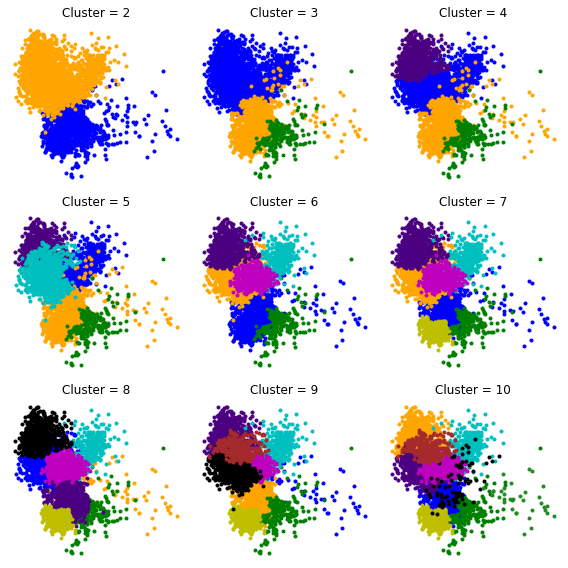

In [ ]:
x1 = X_norm['x acceleration']
x2 = X_norm['y acceleration']
feature_A = 0
feature_B = 1

fig1,axes1 = plt.subplots(3,3,figsize = (8,8))
colors = ["b", "orange", "g", "indigo", "c", "m", "y", "k", "Brown", "ForestGreen"]

Modelos = []
Vector_Clases = []

Silueta = []
CH = []
DB = []
DU = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  Modelo_Agg = AgglomerativeClustering(n_clusters = ncenters, affinity='euclidean', 
                                       connectivity = A, linkage='ward')
  Modelo_Agg.fit(X_norm)
  Clases = Modelo_Agg.labels_
  Modelos.append(Modelo_Agg)
  Vector_Clases.append(Clases)
  
  Silueta.append(silhouette_score(X_norm, Clases))
  CH.append(calinski_harabasz_score(X_norm, Clases))
  DB.append(davies_bouldin_score(X_norm, Clases))
  dist = pairwise_distances(X_norm)
  DU.append(dunn(dist,Clases))
  
  for j in range(ncenters):
    ax.plot(x1[Clases == j], x2[Clases == j], '.', color = colors[j])
  
  ax.set_title('Cluster = {0}'.format(ncenters))
  ax.axis('off')

fig1.tight_layout()
plt.show()

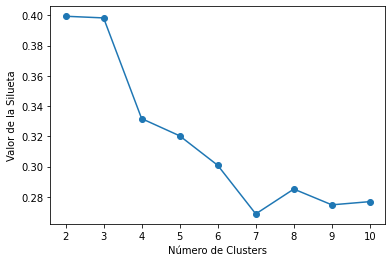

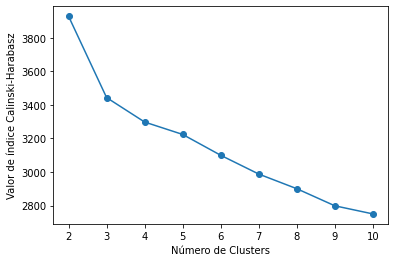

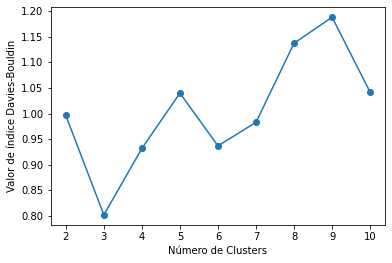

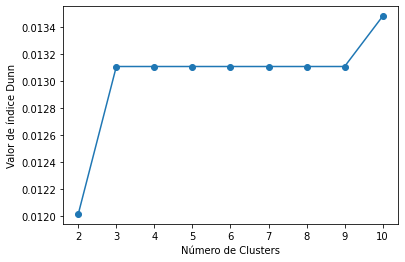

In [ ]:
fig3, ax3 = plt.subplots()
ax3.plot(np.r_[2:11], Silueta, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de la Silueta")

fig4, ax4 = plt.subplots()
ax4.plot(np.r_[2:11], CH, marker = 'o')
ax4.set_xlabel("Número de Clusters")
ax4.set_ylabel("Valor de índice Calinski-Harabasz")

fig5, ax5 = plt.subplots()
ax5.plot(np.r_[2:11], DB, marker = 'o')
ax5.set_xlabel("Número de Clusters")
ax5.set_ylabel("Valor de índice Davies-Bouldin")
plt.show()

fig6, ax6 = plt.subplots()
ax6.plot(np.r_[2:11], DU, marker = 'o')
ax6.set_xlabel("Número de Clusters")
ax6.set_ylabel("Valor de índice Dunn")
plt.show()

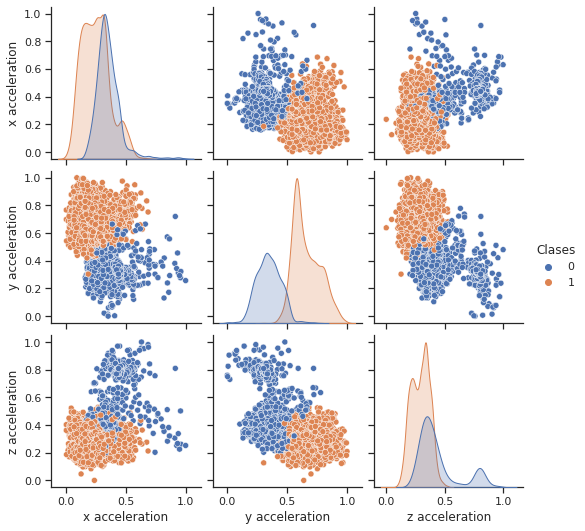

In [ ]:
data_concatenada = pd.concat([X_norm,pd.DataFrame(Vector_Clases[0], columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada, hue = 'Clases')
plt.show()

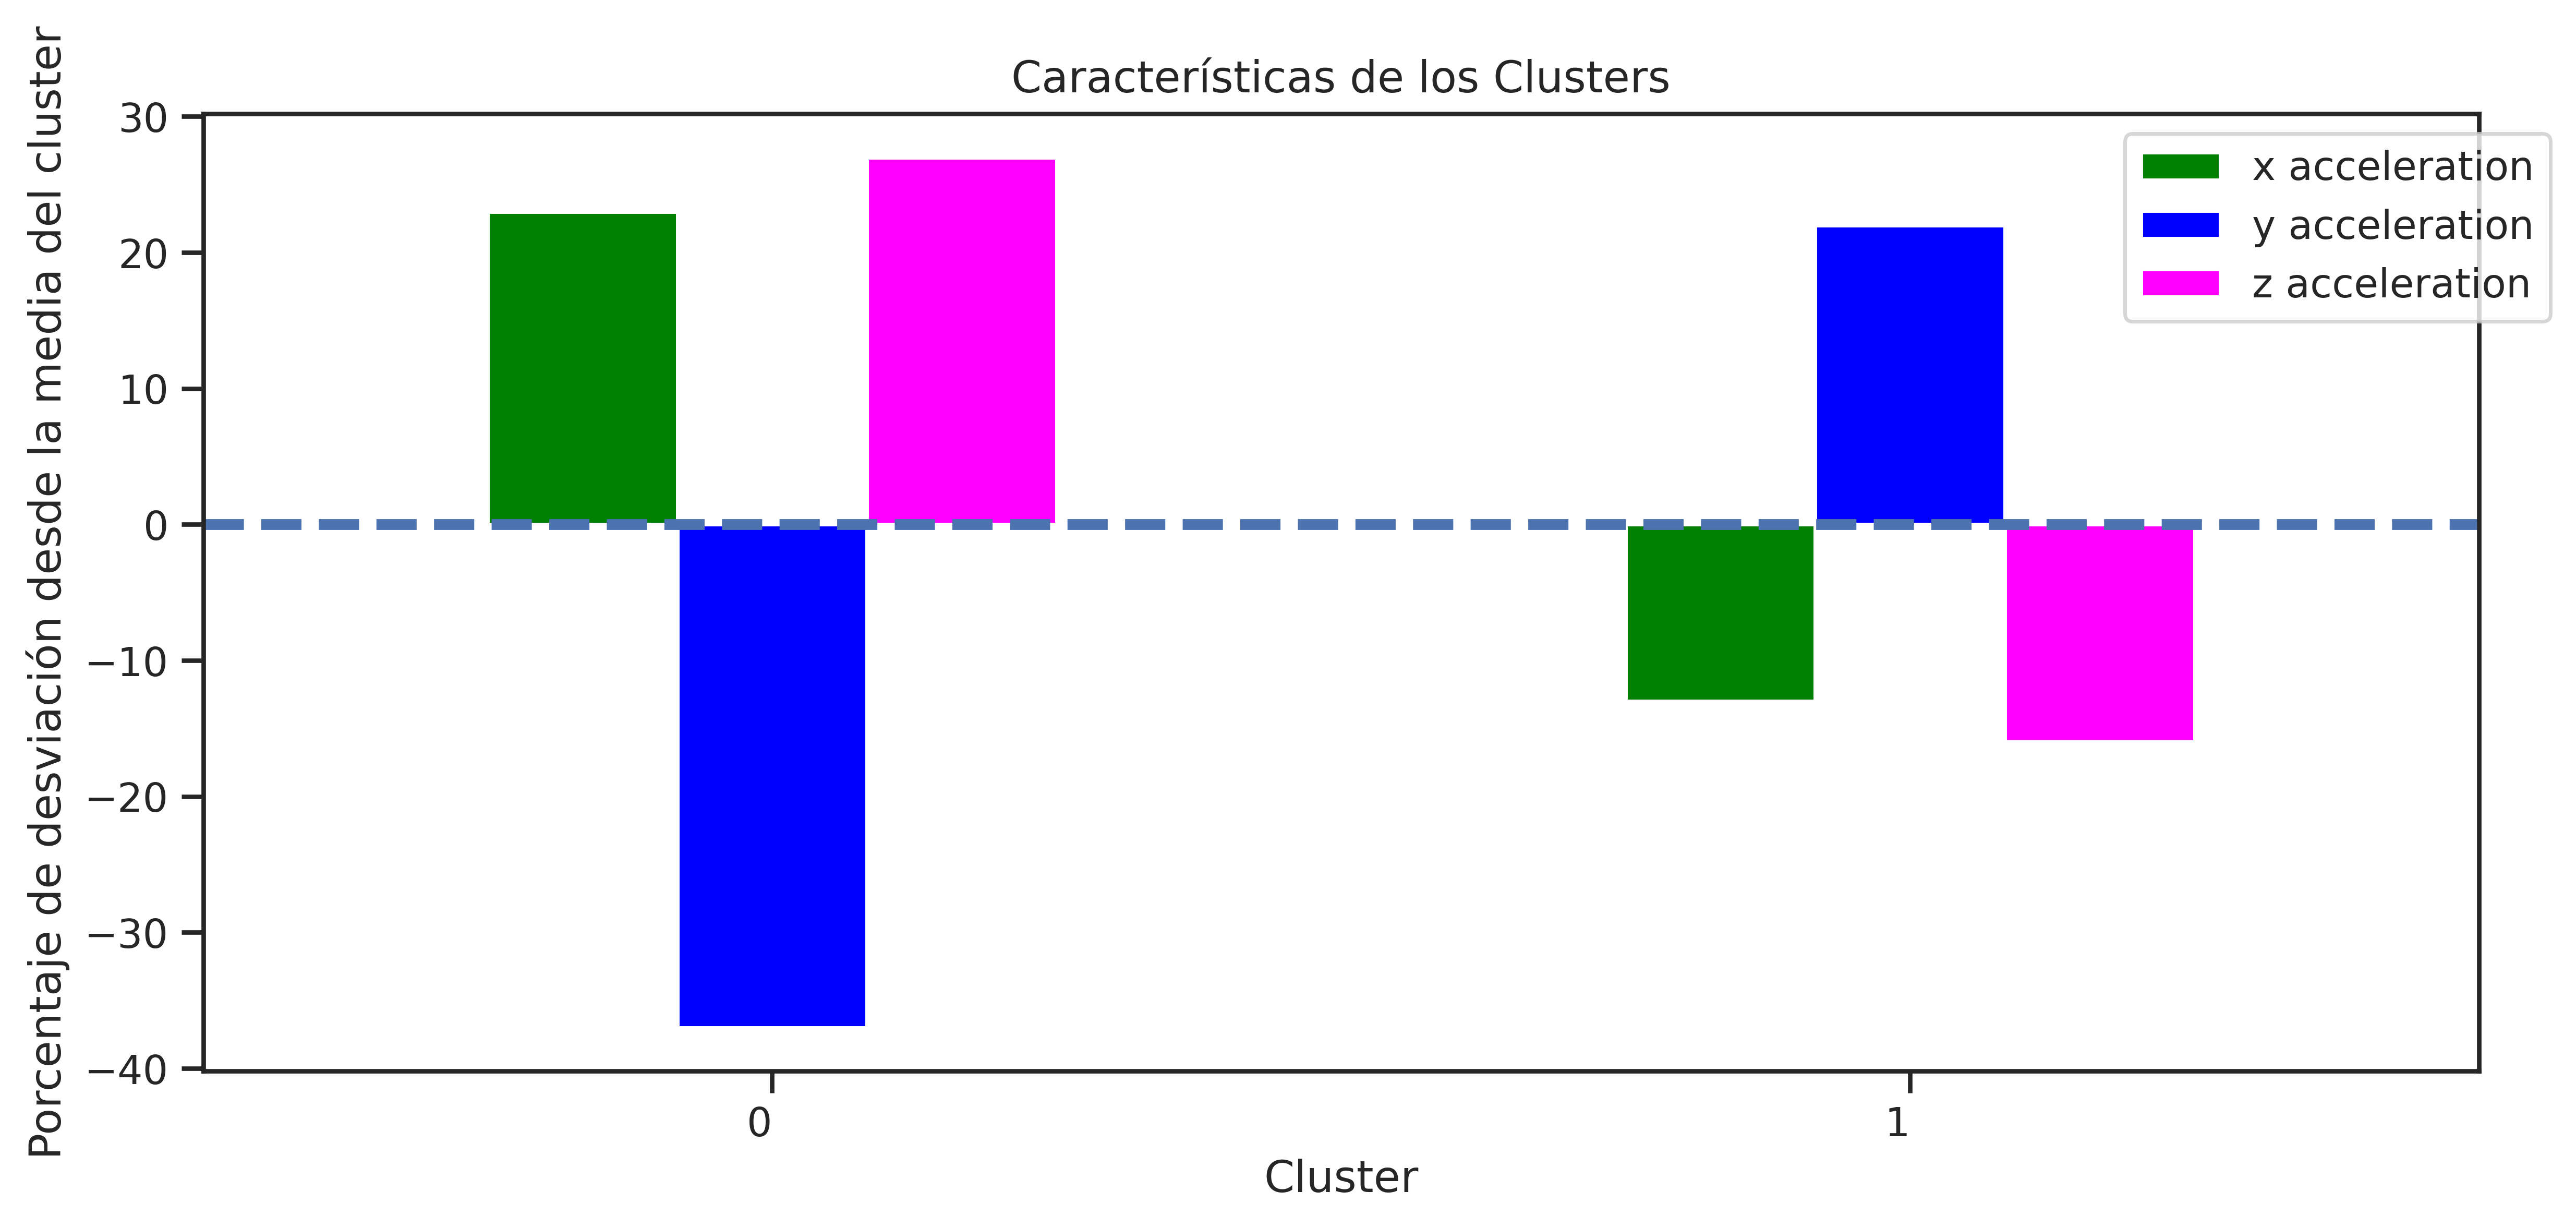

In [ ]:
X_norm_media = pd.concat([pd.DataFrame(data_concatenada.mean().drop('Clases'), columns=['media']), 
                   data_concatenada.groupby('Clases').mean().T], axis=1)
X_norm_dev_rel = X_norm_media.apply(lambda x: round((x-x['media'])/x['media'],2)*100, axis = 1)
X_norm_dev_rel.drop(columns=['media'], inplace=True)

fig = plt.figure(figsize=(10,5), dpi=500)
colores_caracteristicas = ['green', 'blue', 'magenta'] # De acuerdo al número de características

X_norm_dev_rel.T.plot(kind='bar',ax=fig.add_subplot(),title="Características de los Clusters", 
                       color = colores_caracteristicas,
                       xlabel="Cluster",
                       ylabel="Porcentaje de desviación desde la media del cluster"
                      )

plt.axhline(y = 0, linewidth = 3, ls='--', color='b')
plt.legend(bbox_to_anchor = (1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

## Dendograma

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [ ]:
Modelo_Agg_Seleccionado = Modelos[0]
Vector_Clases_Seleccionado = Vector_Clases[0]

Tabla_Clusters_Agg = linkage(X_norm.values, method = 'ward', metric = 'euclidean')
Orden_Tabla_Agg = pd.DataFrame(Tabla_Clusters_Agg, 
                               columns = ['Etiqueta muestra 1', 'Etiqueta muestra 2', 'Distancia', "Numero de Items en Cluster"],
                   index = ['cluster %d' %(c + 1) for c in range(Tabla_Clusters_Agg.shape[0])])
display(Orden_Tabla_Agg)

,Etiqueta muestra 1,Etiqueta muestra 2,Distancia,Numero de Items en Cluster
cluster 1,4984.0,5048.0,0.000000,2.0
cluster 2,1877.0,2886.0,0.000000,2.0
cluster 3,543.0,554.0,0.000000,2.0
cluster 4,541.0,550.0,0.000000,2.0
cluster 5,272.0,530.0,0.000000,2.0
...,...,...,...,...
cluster 5063,10119.0,10128.0,4.422620,2043.0
cluster 5064,10122.0,10130.0,6.118584,2410.0
cluster 5065,10118.0,10129.0,9.165796,1494.0
cluster 5066,10127.0,10131.0,9.202093,3574.0


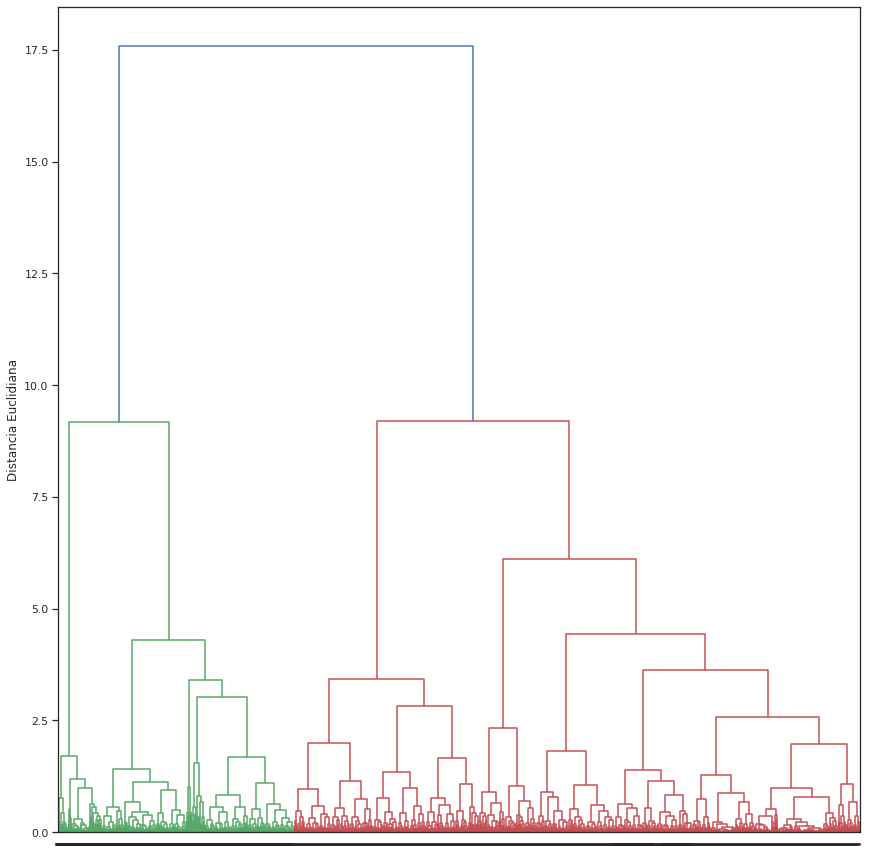

In [ ]:
fig = plt.figure(figsize = (12,12))
den = dendrogram(Tabla_Clusters_Agg, labels = Vector_Clases_Seleccionado)
plt.tight_layout()
plt.ylabel('Distancia Euclidiana')
plt.show()

## Métodos de Vínculos (Linkage)

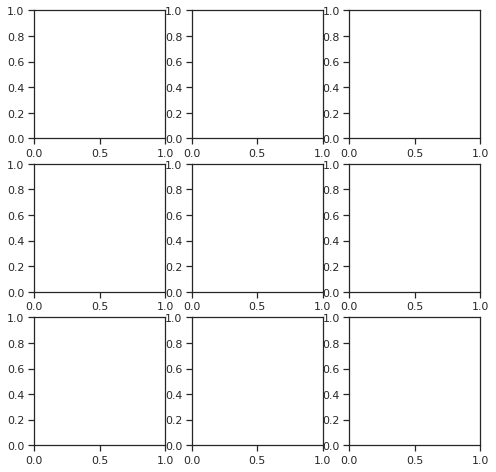

In [ ]:
x1 = X_norm['x acceleration']
x2 = X_norm['y acceleration']
feature_A = 0
feature_B = 1

fig1,axes1 = plt.subplots(3,3,figsize = (8,8))
colors = ["b", "orange", "g", "indigo", "c", "m", "y", "k", "Brown", "ForestGreen"]

Vector_Clases_1 = []
Vector_Clases_2 = []
Vector_Clases_3 = []

Silueta = []
CH = []
DB = []
DU = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  Modelo_Agg_1 = AgglomerativeClustering(n_clusters = ncenters, affinity='euclidean', 
                                       connectivity = A, linkage='ward')
  Modelo_Agg_2 = AgglomerativeClustering(n_clusters = ncenters, affinity='cosine', 
                                       connectivity = None, linkage='average')
  Modelo_Agg_3 = AgglomerativeClustering(n_clusters = ncenters, affinity='cosine', 
                                       connectivity = None, linkage='complete')

  Modelo_Agg_1.fit(X_norm)
  Modelo_Agg_2.fit(X_norm)
  Modelo_Agg_3.fit(X_norm)

  Clases_1 = Modelo_Agg_1.labels_
  Clases_2 = Modelo_Agg_2.labels_
  Clases_3 = Modelo_Agg_3.labels_

  Vector_Clases_1.append(Clases_1)
  Vector_Clases_2.append(Clases_2)
  Vector_Clases_3.append(Clases_3)
  
  Silueta.append([silhouette_score(X_norm, Clases_1), silhouette_score(X_norm, Clases_2), silhouette_score(X_norm, Clases_3)])
  CH.append([calinski_harabasz_score(X_norm, Clases_1), calinski_harabasz_score(X_norm, Clases_2), calinski_harabasz_score(X_norm, Clases_3)])
  DB.append([davies_bouldin_score(X_norm, Clases_1), davies_bouldin_score(X_norm, Clases_2), davies_bouldin_score(X_norm, Clases_3)])
  dist = pairwise_distances(X_norm)
  DU.append([dunn(dist,Clases_1), dunn(dist,Clases_2), dunn(dist,Clases_3)])

In [ ]:
Silueta = pd.DataFrame(Silueta, columns = ['Ward','Average', 'Complete'], copy = True)
CH = pd.DataFrame(CH, columns = ['Ward','Average', 'Complete'], copy = True)
DB = pd.DataFrame(DB, columns = ['Ward','Average', 'Complete'], copy = True)
DU = pd.DataFrame(DU, columns = ['Ward','Average', 'Complete'], copy = True)

Eval_Ward = [Silueta['Ward'].max(), CH['Ward'].max(), DB['Ward'].min(), DU['Ward'].min()]
Eval_Average = [Silueta['Average'].max(), CH['Average'].max(), DB['Average'].min(), DU['Average'].min()]
Eval_Complete = [Silueta['Complete'].max(), CH['Complete'].max(), DB['Complete'].min(), DU['Complete'].min()]

Clusters_Ward = [np.argmax(Silueta['Ward'].values) + 2, np.argmax(CH['Ward'].values) + 2, 
                   np.argmin(DB['Ward'].values) + 2, np.argmin(DU['Ward'].values) + 2]
Clusters_Average = [np.argmax(Silueta['Average'].values) + 2, np.argmax(CH['Average'].values) + 2, 
                   np.argmin(DB['Average'].values) + 2, np.argmin(DU['Average'].values) + 2]
Clusters_Complete = [np.argmax(Silueta['Complete'].values) + 2, np.argmax(CH['Complete'].values) + 2, 
                   np.argmin(DB['Complete'].values) + 2, np.argmin(DU['Complete'].values) + 2]

In [ ]:
Tabla_Linkage = pd.concat([pd.DataFrame(Eval_Ward), pd.DataFrame(Eval_Average), pd.DataFrame(Eval_Complete), 
                               pd.DataFrame(Clusters_Ward), pd.DataFrame(Clusters_Average), pd.DataFrame(Clusters_Complete)], axis = 1)
Tabla_Linkage = pd.DataFrame(Tabla_Linkage.values, 
                                 columns = ['Ward', 'Average', 'Complete', 'Num.Opt.Cluster.Ward','Num.Opt.Cluster.Average',
                                            'Num.Opt.Cluster.Complete' ],
                                 index = ['Silueta', 'CH', 'DB', 'Dunn'])
display(Tabla_Linkage)

,Ward,Average,Complete,Num.Opt.Cluster.Ward,Num.Opt.Cluster.Average,Num.Opt.Cluster.Complete
Silueta,0.399438,0.418117,0.424494,2.0,2.0,2.0
CH,3928.019526,4014.412340,3975.233581,2.0,2.0,2.0
DB,0.802032,0.827307,0.883670,3.0,4.0,4.0
Dunn,0.012016,0.006110,0.006068,2.0,9.0,10.0


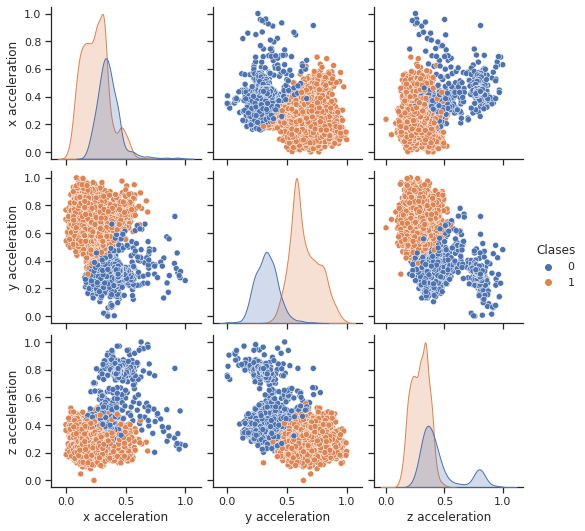

In [ ]:
data_concatenada_average_method = pd.concat([X_norm,pd.DataFrame(Vector_Clases_2[0], columns = ['Clases'])], axis = 1)
sns.set_theme(style="ticks")
sns.pairplot(data_concatenada_average_method, hue = 'Clases')
plt.show()

## Agrupamiento Jeraraquico vs Agrupamiento KMeans

In [ ]:
from sklearn.cluster import KMeans # Algoritmo KMeans

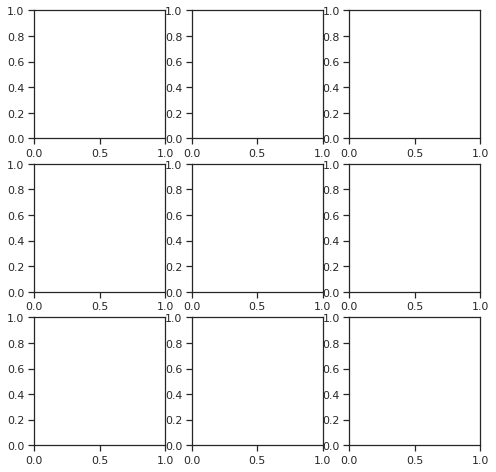

In [ ]:
x1 = X_norm['x acceleration']
x2 = X_norm['y acceleration']
feature_A = 0
feature_B = 1

fig1,axes1 = plt.subplots(3,3,figsize = (8,8))
error = 1e-4
max_iteraciones = 5000
colors = ["b", "orange", "g", "indigo", "c", "m", "y", "k", "Brown", "ForestGreen"]

Modelos_KM = [] # Almacenar los modelos generados por el agrupamiento KMeans
Modelos_AC = [] # Almacenar los modelos generados por el agrupamiento Jerárquico
Vector_Clases_KM = []
Vector_Clases_AC = []

Silueta = []
CH = []
DB = []
DU = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
  Modelo_Kmeans = KMeans(n_clusters = ncenters, max_iter = max_iteraciones, tol = error, random_state = 17)
  Modelo_Kmeans.fit(X_norm)  
  
  Modelo_Agg = AgglomerativeClustering(n_clusters = ncenters, affinity='euclidean', 
                                       connectivity = A, linkage='ward')
  Modelo_Agg.fit(X_norm)

  Modelos_KM.append(Modelo_Kmeans)
  Modelos_AC.append(Modelo_Agg)

  Clases_KM = Modelo_Kmeans.labels_
  Clases_Agg = Modelo_Agg.labels_

  Vector_Clases_KM.append(Clases_KM)
  Vector_Clases_AC.append(Clases_Agg)
  
  Silueta.append([silhouette_score(X_norm, Clases_KM), silhouette_score(X_norm, Clases_Agg)])
  CH.append([calinski_harabasz_score(X_norm, Clases_KM), calinski_harabasz_score(X_norm, Clases_Agg)])
  DB.append([davies_bouldin_score(X_norm, Clases_KM), davies_bouldin_score(X_norm, Clases_Agg)])
  dist = pairwise_distances(X_norm)
  DU.append([dunn(dist,Clases_KM), dunn(dist,Clases_Agg)])

In [ ]:
Silueta = pd.DataFrame(Silueta, columns = ['KMeans','Agrup.Jerarquico'], copy = True)
CH = pd.DataFrame(CH, columns = ['KMeans','Agrup.Jerarquico'], copy = True)
DB = pd.DataFrame(DB, columns = ['KMeans','Agrup.Jerarquico'], copy = True)
DU = pd.DataFrame(DU, columns = ['KMeans','Agrup.Jerarquico'], copy = True)
Eval_KMeans = [Silueta['KMeans'].max(), CH['KMeans'].max(), DB['KMeans'].min(), DU['KMeans'].min()]
Eval_Agg = [Silueta['Agrup.Jerarquico'].max(), 
            CH['Agrup.Jerarquico'].max(), DB['Agrup.Jerarquico'].min(), DU['Agrup.Jerarquico'].min()]
Clusters_KMeans = [np.argmax(Silueta['KMeans'].values) + 2, np.argmax(CH['KMeans'].values) + 2, 
                   np.argmin(DB['KMeans'].values) + 2, np.argmin(DU['KMeans'].values) + 2]
Clusters_Agg = [np.argmax(Silueta['Agrup.Jerarquico'].values) + 2, np.argmax(CH['Agrup.Jerarquico'].values) + 2, 
                   np.argmin(DB['Agrup.Jerarquico'].values) + 2, np.argmin(DU['Agrup.Jerarquico'].values) + 2]

In [ ]:
Tabla_Comparativa = pd.concat([pd.DataFrame(Eval_KMeans), pd.DataFrame(Eval_Agg), 
                               pd.DataFrame(Clusters_KMeans), pd.DataFrame(Clusters_Agg)], axis = 1)
Tabla_Comparativa = pd.DataFrame(Tabla_Comparativa.values, 
                                 columns = ['Metrica_Kmeans', 'Metrica_AC', 'Num.Opt.Cluster.KMeans','Num.Opt.Cluster.AC'],
                                 index = ['Silueta', 'CH', 'DB', 'Dunn'])
display(Tabla_Comparativa)

,Metrica_Kmeans,Metrica_AC,Num.Opt.Cluster.KMeans,Num.Opt.Cluster.AC
Silueta,0.420570,0.399438,2.0,2.0
CH,4084.502616,3928.019526,2.0,2.0
DB,0.805601,0.802032,3.0,3.0
Dunn,0.003537,0.012016,5.0,2.0
